### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset from the given excel sheet and reading data from a particular sheet

In [2]:
dataset_org = pd.read_excel('Assignment- Membership woes.xlsx',sheetname='Data',index_col=0)
dataset_org.head(10)

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
MEMBERSHIP_NUMBER,,,,,,,,,,,,,,
A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN
A00006,12,110000.0,NaN,NaN,NaN,1.0,TYPE-B,48,3,ANNUAL,5311,INFORCE,20070215,NaN
A00007,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,20070221,NaN
A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,20070312,20090811.0
A00009,35,120000.0,NaN,NaN,NaN,1.0,TYPE-B,35,2,MONTHLY,4522,INFORCE,20070316,NaN


### Checking what type of data is present in the given excel sheet

In [3]:
dataset_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10362 entries, A00001 to A10366
Data columns (total 14 columns):
MEMBERSHIP_TERM_YEARS    10362 non-null int64
ANNUAL_FEES              10362 non-null float64
MEMBER_MARITAL_STATUS    7765 non-null object
MEMBER_GENDER            9751 non-null object
MEMBER_ANNUAL_INCOME     8608 non-null float64
MEMBER_OCCUPATION_CD     10319 non-null float64
MEMBERSHIP_PACKAGE       10362 non-null object
MEMBER_AGE_AT_ISSUE      10362 non-null int64
ADDITIONAL_MEMBERS       10362 non-null int64
PAYMENT_MODE             10362 non-null object
AGENT_CODE               10362 non-null object
MEMBERSHIP_STATUS        10362 non-null object
START_DATE (YYYYMMDD)    10362 non-null int64
END_DATE  (YYYYMMDD)     3143 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


### Checking null values present for different variables

In [4]:
dataset_org.isnull().sum()

MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

### Null value imputation for missing values

In [5]:
print(dataset_org.MEMBER_MARITAL_STATUS.value_counts())
print(dataset_org.MEMBER_GENDER.value_counts())
print(dataset_org.MEMBER_ANNUAL_INCOME.median())
print(dataset_org.MEMBER_OCCUPATION_CD.value_counts())

M    6430
S    1144
W     146
D      45
Name: MEMBER_MARITAL_STATUS, dtype: int64
M    7330
F    2421
Name: MEMBER_GENDER, dtype: int64
549996.0
1.0    7281
2.0    1778
6.0     728
5.0     324
4.0     207
3.0       1
Name: MEMBER_OCCUPATION_CD, dtype: int64


In [6]:
#Considering majority class for members Gender, Marital status and Occupation code
dataset_org.MEMBER_MARITAL_STATUS = dataset_org.MEMBER_MARITAL_STATUS.fillna('M')
dataset_org.MEMBER_GENDER = dataset_org.MEMBER_GENDER.fillna('M')
dataset_org.MEMBER_OCCUPATION_CD = dataset_org.MEMBER_OCCUPATION_CD.fillna(1.0)

#Considering mean value for imputing missing Annual income of member
dataset_org.MEMBER_ANNUAL_INCOME = dataset_org.MEMBER_ANNUAL_INCOME.fillna(549996.0)

In [7]:
dataset_org.isnull().sum()

MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS       0
MEMBER_GENDER               0
MEMBER_ANNUAL_INCOME        0
MEMBER_OCCUPATION_CD        0
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [8]:
dataset_org.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,1.036200e+04,10362.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.298568e+06,1.708068,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.601904e+07,1.451660,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.000000e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [9]:
dataset_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10362 entries, A00001 to A10366
Data columns (total 14 columns):
MEMBERSHIP_TERM_YEARS    10362 non-null int64
ANNUAL_FEES              10362 non-null float64
MEMBER_MARITAL_STATUS    10362 non-null object
MEMBER_GENDER            10362 non-null object
MEMBER_ANNUAL_INCOME     10362 non-null float64
MEMBER_OCCUPATION_CD     10362 non-null float64
MEMBERSHIP_PACKAGE       10362 non-null object
MEMBER_AGE_AT_ISSUE      10362 non-null int64
ADDITIONAL_MEMBERS       10362 non-null int64
PAYMENT_MODE             10362 non-null object
AGENT_CODE               10362 non-null object
MEMBERSHIP_STATUS        10362 non-null object
START_DATE (YYYYMMDD)    10362 non-null int64
END_DATE  (YYYYMMDD)     3143 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


### checking correlation

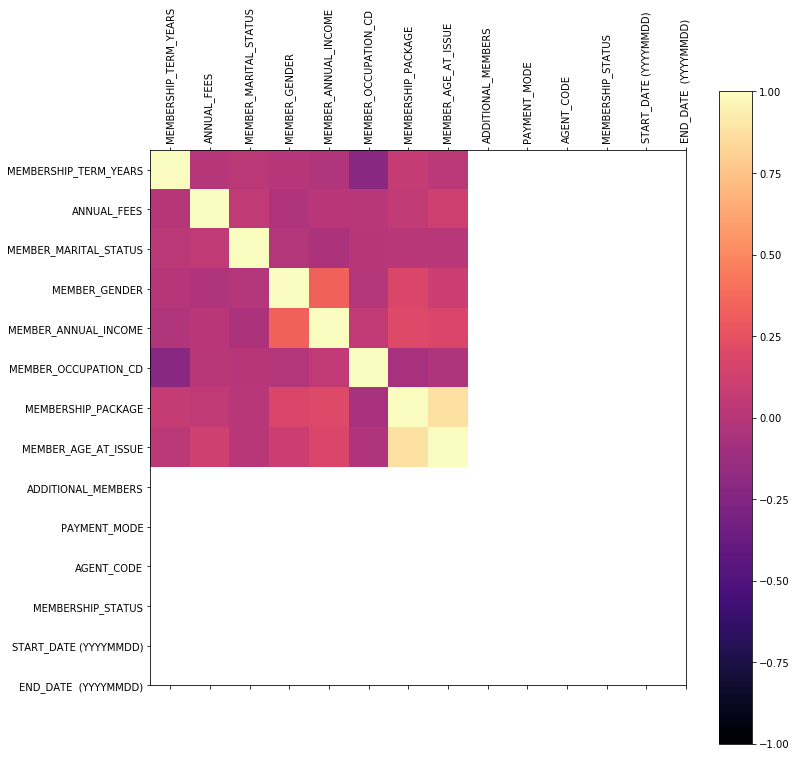

In [10]:
corr = dataset_org.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='magma', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset_org.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset_org.columns)
ax.set_yticklabels(dataset_org.columns)
plt.show()

### converting target variable to 0(INFORCE) and 1(CANCELLED)

In [10]:
dataset_org.MEMBERSHIP_STATUS[dataset_org.MEMBERSHIP_STATUS == 'INFORCE'] = 0
dataset_org.MEMBERSHIP_STATUS[dataset_org.MEMBERSHIP_STATUS == 'CANCELLED'] = 1

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Creating dummy variables out of Members marital status

In [11]:
df_MEMBER_MARITAL_STATUS = pd.get_dummies(dataset_org.MEMBER_MARITAL_STATUS
                                          ,prefix='MEMBER_MARITAL_STATUS')
df_MEMBER_MARITAL_STATUS.head()

,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W
MEMBERSHIP_NUMBER,,,,
A00001,0,1,0,0
A00002,0,1,0,0
A00003,0,1,0,0
A00004,0,1,0,0
A00005,0,1,0,0


### Creating dummy variables out of Membership package

In [12]:
df_MEMBERSHIP_PACKAGE = pd.get_dummies(dataset_org.MEMBERSHIP_PACKAGE
                                          ,prefix='MEMBERSHIP_PACKAGE')
df_MEMBERSHIP_PACKAGE.head()

,MEMBERSHIP_PACKAGE_TYPE-A,MEMBERSHIP_PACKAGE_TYPE-B
MEMBERSHIP_NUMBER,,
A00001,0,1
A00002,0,1
A00003,0,1
A00004,0,1
A00005,0,1


### Creating dummy variables out of Payment mode status

In [13]:
df_PAYMENT_MODE = pd.get_dummies(dataset_org.PAYMENT_MODE
                                          ,prefix='PAYMENT_MODE')
df_PAYMENT_MODE.head()

,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
MEMBERSHIP_NUMBER,,,,,
A00001,1,0,0,0,0
A00002,0,0,1,0,0
A00003,1,0,0,0,0
A00004,1,0,0,0,0
A00005,0,0,1,0,0


### converting target variable to 0(MALE) and 1(FEMALE)

In [14]:
dataset_org.MEMBER_GENDER[dataset_org.MEMBER_GENDER == 'M'] = 0
dataset_org.MEMBER_GENDER[dataset_org.MEMBER_GENDER == 'F'] = 1

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
dataset_org.isnull().sum()

MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS       0
MEMBER_GENDER               0
MEMBER_ANNUAL_INCOME        0
MEMBER_OCCUPATION_CD        0
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [16]:
dataset_org.head(3)
dataset_org.columns.values

array(['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS',
       'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD',
       'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'], dtype=object)

### Concatenating all the dummy variables created with the original dataset

In [17]:
dataset_dumm = pd.concat([dataset_org[['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES','MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
                'MEMBER_OCCUPATION_CD','MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS','AGENT_CODE', 'MEMBERSHIP_STATUS']]
                        ,df_MEMBER_MARITAL_STATUS
                        ,df_MEMBERSHIP_PACKAGE
                        ,df_PAYMENT_MODE],axis=1)

In [18]:
dataset_dumm.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,AGENT_CODE,MEMBERSHIP_STATUS,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W,MEMBERSHIP_PACKAGE_TYPE-A,MEMBERSHIP_PACKAGE_TYPE-B,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
MEMBERSHIP_NUMBER,,,,,,,,,,,,,,,,,,,,
A00001,29,113125.0,0,25200000.0,1.0,45,2,477,0,0,1,0,0,0,1,1,0,0,0,0
A00002,38,112220.0,0,10339200.0,1.0,36,3,255,0,0,1,0,0,0,1,0,0,1,0,0
A00003,12,100000.0,0,14400000.0,1.0,42,1,7866,0,0,1,0,0,0,1,1,0,0,0,0
A00004,12,100000.0,0,9000000.0,1.0,39,2,200533,0,0,1,0,0,0,1,1,0,0,0,0
A00005,46,100000.0,0,4800000.0,1.0,27,2,6988,0,0,1,0,0,0,1,0,0,1,0,0


### Removing unwanted row from the dataset under the Agent_code column

In [19]:
## Error Unable to parse string ".." at position 10291

dataset_dumm = dataset_dumm[dataset_dumm.AGENT_CODE != '..']

### Converting categorical data to numeric

In [20]:
dataset_dumm['MEMBER_GENDER'] = pd.to_numeric(dataset_dumm['MEMBER_GENDER'])
dataset_dumm['AGENT_CODE'] = pd.to_numeric(dataset_dumm['AGENT_CODE'])
dataset_dumm['MEMBERSHIP_STATUS'] = pd.to_numeric(dataset_dumm['MEMBERSHIP_STATUS'])
dataset_dumm['MEMBER_ANNUAL_INCOME'] = pd.to_numeric(dataset_dumm['MEMBER_ANNUAL_INCOME'])

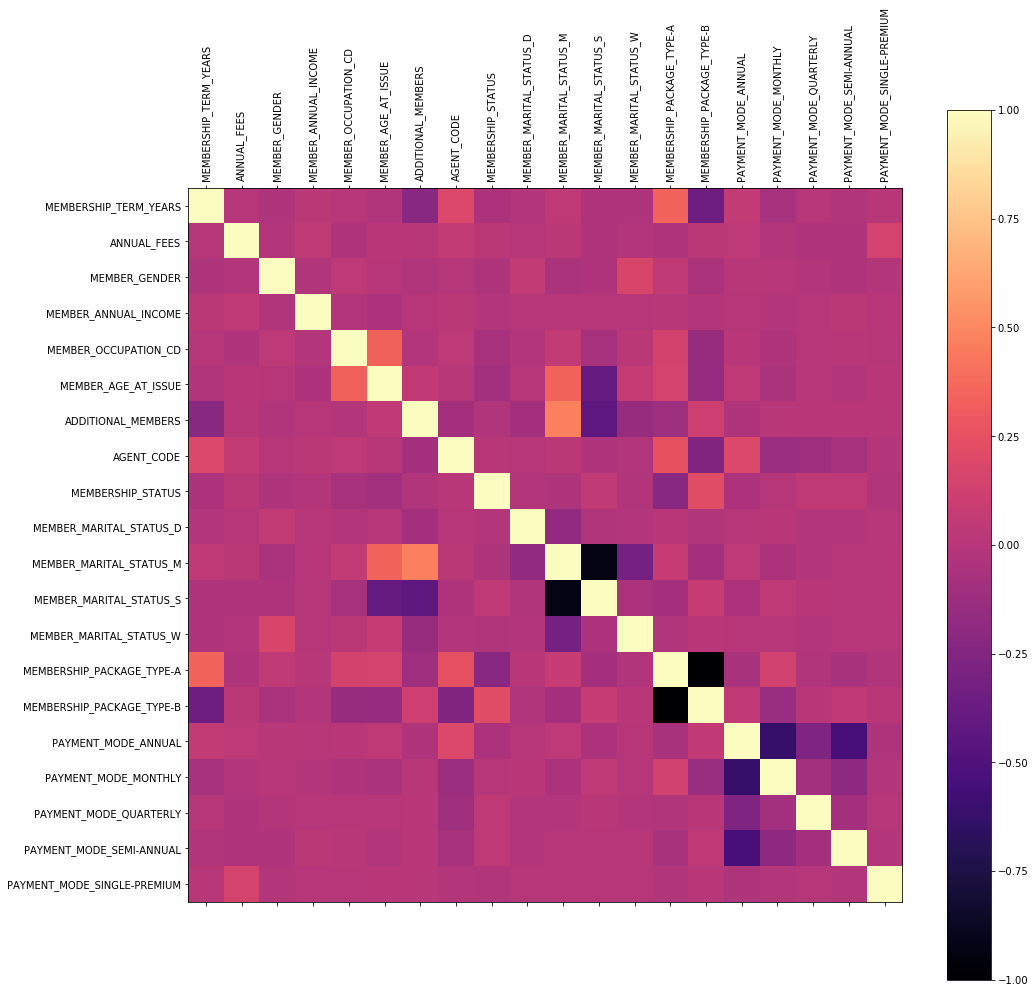

In [24]:
#checking correlation

corr = dataset_dumm.corr()
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='magma', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset_dumm.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset_dumm.columns)
ax.set_yticklabels(dataset_dumm.columns)
plt.show()

In [25]:
dataset_dumm.corr()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,AGENT_CODE,MEMBERSHIP_STATUS,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W,MEMBERSHIP_PACKAGE_TYPE-A,MEMBERSHIP_PACKAGE_TYPE-B,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
MEMBERSHIP_TERM_YEARS,1.000000,-0.003668,-0.034527,0.024221,-0.002890,-0.017331,-0.215891,0.191207,-0.042020,-0.013272,0.039399,-0.028749,-0.028142,0.345700,-0.345700,0.070259,-0.071019,-0.003286,-0.017325,0.009413
ANNUAL_FEES,-0.003668,1.000000,-0.013471,0.051223,-0.025306,0.021185,0.013317,0.068897,0.028803,-0.003136,0.027965,-0.024791,-0.011820,-0.030913,0.030913,0.031505,-0.013746,-0.023511,-0.027798,0.148540
MEMBER_GENDER,-0.034527,-0.013471,1.000000,-0.022537,0.033399,0.002310,-0.019790,-0.004994,-0.031810,0.064138,-0.047107,-0.025622,0.166245,0.048716,-0.048716,0.015290,0.007491,-0.008500,-0.023850,-0.008534
MEMBER_ANNUAL_INCOME,0.024221,0.051223,-0.022537,1.000000,-0.013926,-0.045190,0.007104,0.031154,-0.012874,-0.000979,0.007448,-0.006481,-0.003393,0.014064,-0.014064,-0.004560,-0.014460,-0.007249,0.026042,0.000077
MEMBER_OCCUPATION_CD,-0.002890,-0.025306,0.033399,-0.013926,1.000000,0.342539,-0.013142,0.033967,-0.066583,-0.015026,0.064145,-0.075522,0.026865,0.147084,-0.147084,0.017193,-0.030154,0.001350,0.009068,-0.003097
MEMBER_AGE_AT_ISSUE,-0.017331,0.021185,0.002310,-0.045190,0.342539,1.000000,0.060077,0.009473,-0.091066,-0.001579,0.345799,-0.396285,0.071672,0.148652,-0.148652,0.045754,-0.050117,0.001549,-0.010297,0.021172
ADDITIONAL_MEMBERS,-0.215891,0.013317,-0.019790,0.007104,-0.013142,0.060077,1.000000,-0.078540,-0.018574,-0.081453,0.474295,-0.434484,-0.147439,-0.114694,0.114694,-0.030140,0.009577,0.017836,0.019850,0.015138
AGENT_CODE,0.191207,0.068897,-0.004994,0.031154,0.033967,0.009473,-0.078540,1.000000,0.008635,-0.001315,0.030467,-0.026728,-0.014798,0.254039,-0.254039,0.193500,-0.118245,-0.110722,-0.074397,-0.011196
MEMBERSHIP_STATUS,-0.042020,0.028803,-0.031810,-0.012874,-0.066583,-0.091066,-0.018574,0.008635,1.000000,-0.014848,-0.037618,0.049552,-0.016546,-0.215190,0.215190,-0.044270,-0.004684,0.039374,0.046093,-0.019457
MEMBER_MARITAL_STATUS_D,-0.013272,-0.003136,0.064138,-0.000979,-0.015026,-0.001579,-0.081453,-0.001315,-0.014848,1.000000,-0.171735,-0.023269,-0.007896,0.020324,-0.020324,-0.001870,0.018392,-0.013062,-0.010383,-0.001947


In [21]:
dataset_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10361 entries, A00001 to A10366
Data columns (total 20 columns):
MEMBERSHIP_TERM_YEARS          10361 non-null int64
ANNUAL_FEES                    10361 non-null float64
MEMBER_GENDER                  10361 non-null int64
MEMBER_ANNUAL_INCOME           10361 non-null float64
MEMBER_OCCUPATION_CD           10361 non-null float64
MEMBER_AGE_AT_ISSUE            10361 non-null int64
ADDITIONAL_MEMBERS             10361 non-null int64
AGENT_CODE                     10361 non-null int64
MEMBERSHIP_STATUS              10361 non-null int64
MEMBER_MARITAL_STATUS_D        10361 non-null uint8
MEMBER_MARITAL_STATUS_M        10361 non-null uint8
MEMBER_MARITAL_STATUS_S        10361 non-null uint8
MEMBER_MARITAL_STATUS_W        10361 non-null uint8
MEMBERSHIP_PACKAGE_TYPE-A      10361 non-null uint8
MEMBERSHIP_PACKAGE_TYPE-B      10361 non-null uint8
PAYMENT_MODE_ANNUAL            10361 non-null uint8
PAYMENT_MODE_MONTHLY           10361 non-null uint8


### Plotting graphs against different variables to understand data

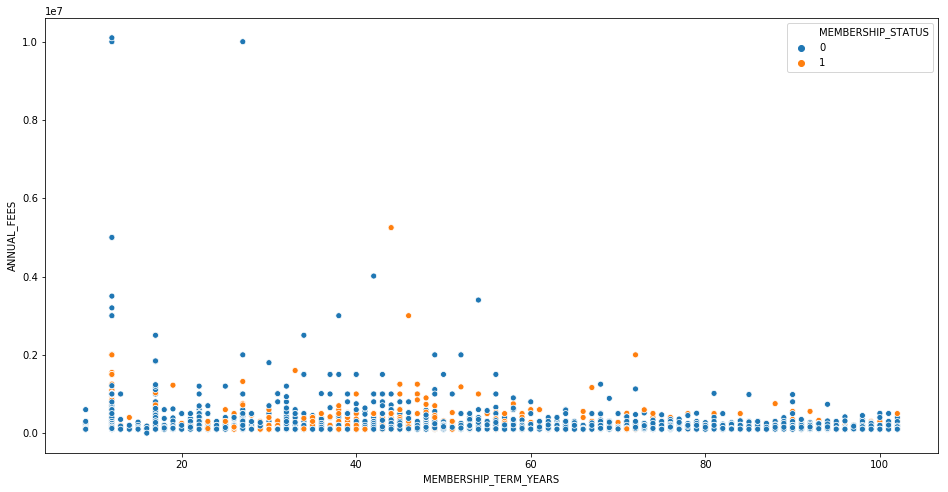

In [26]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(dataset_dumm.MEMBERSHIP_TERM_YEARS,dataset_dumm.ANNUAL_FEES,hue=dataset_dumm.MEMBERSHIP_STATUS)

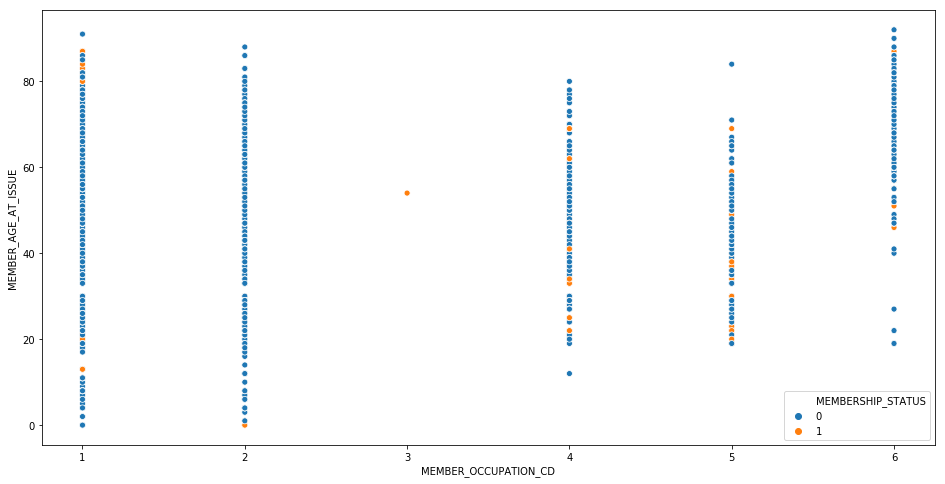

In [27]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(dataset_dumm.MEMBER_OCCUPATION_CD,dataset_dumm.MEMBER_AGE_AT_ISSUE,hue=dataset_dumm.MEMBERSHIP_STATUS)

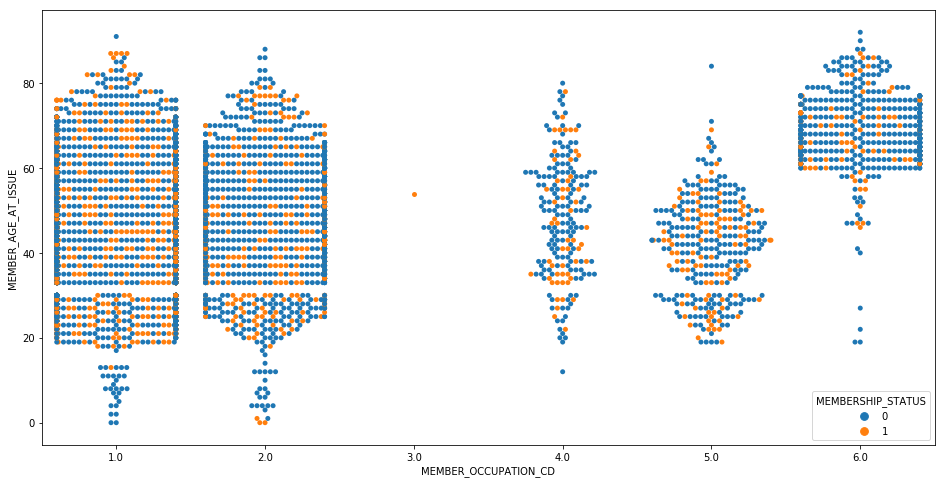

In [84]:
fig = plt.figure(figsize=(16,8))
sns.swarmplot(dataset_dumm.MEMBER_OCCUPATION_CD,dataset_dumm.MEMBER_AGE_AT_ISSUE,hue=dataset_dumm.MEMBERSHIP_STATUS)

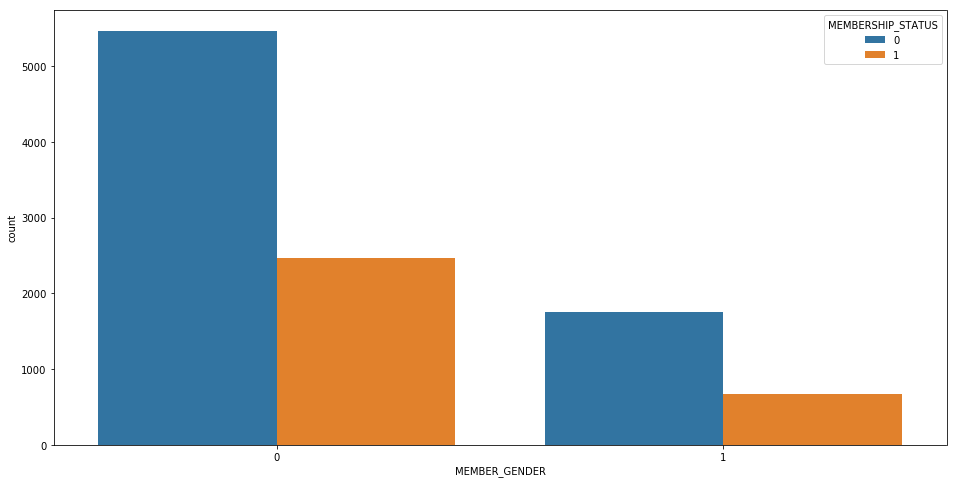

In [28]:
fig = plt.figure(figsize=(16,8))
sns.countplot(dataset_dumm.MEMBER_GENDER,hue=dataset_dumm.MEMBERSHIP_STATUS)

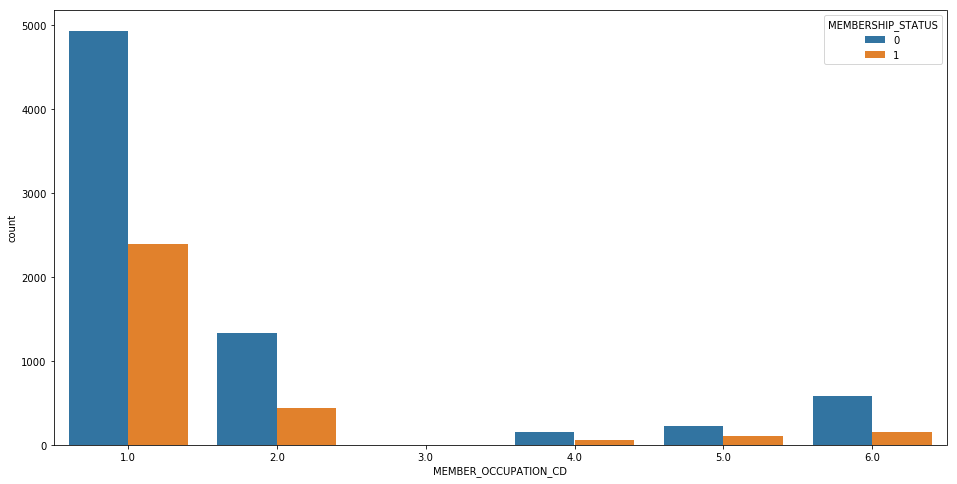

In [29]:
fig = plt.figure(figsize=(16,8))
sns.countplot(dataset_dumm.MEMBER_OCCUPATION_CD,hue=dataset_dumm.MEMBERSHIP_STATUS)

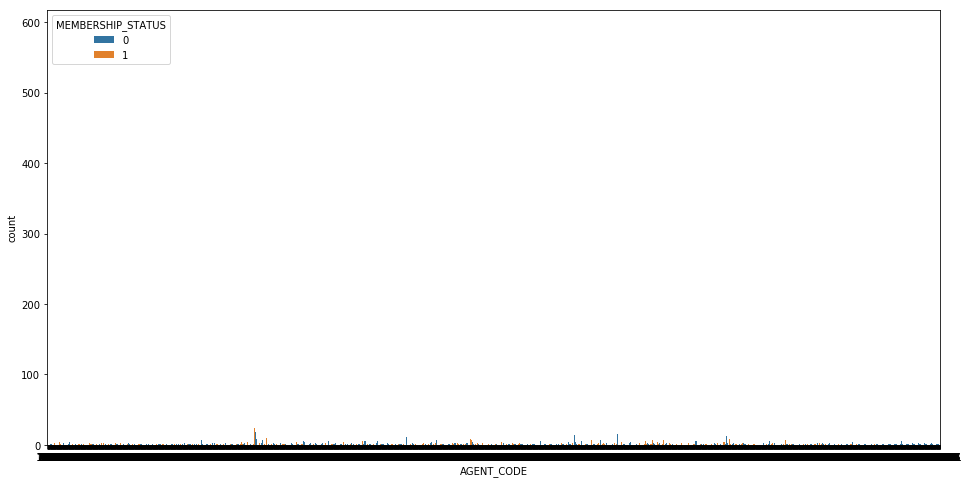

In [30]:
fig = plt.figure(figsize=(16,8))
sns.countplot(dataset_dumm.AGENT_CODE,hue=dataset_dumm.MEMBERSHIP_STATUS)

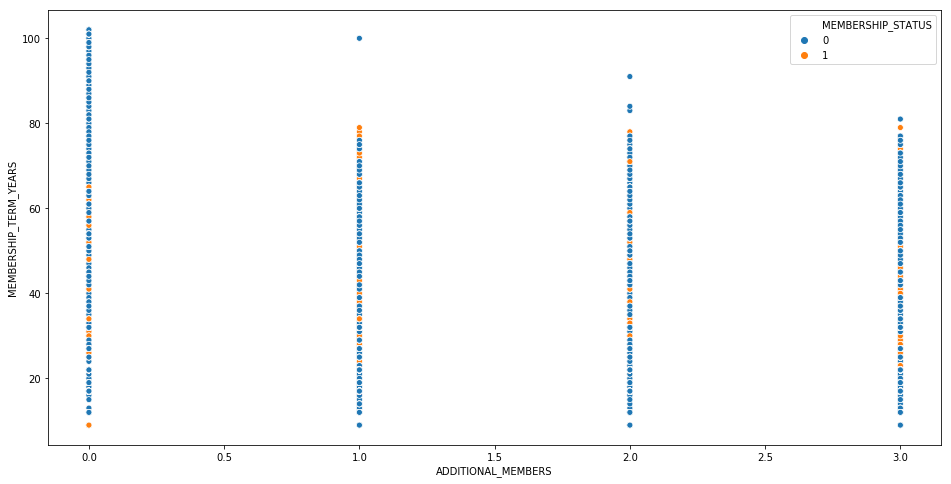

In [31]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(dataset_dumm.ADDITIONAL_MEMBERS,dataset_dumm.MEMBERSHIP_TERM_YEARS,hue=dataset_dumm.MEMBERSHIP_STATUS)

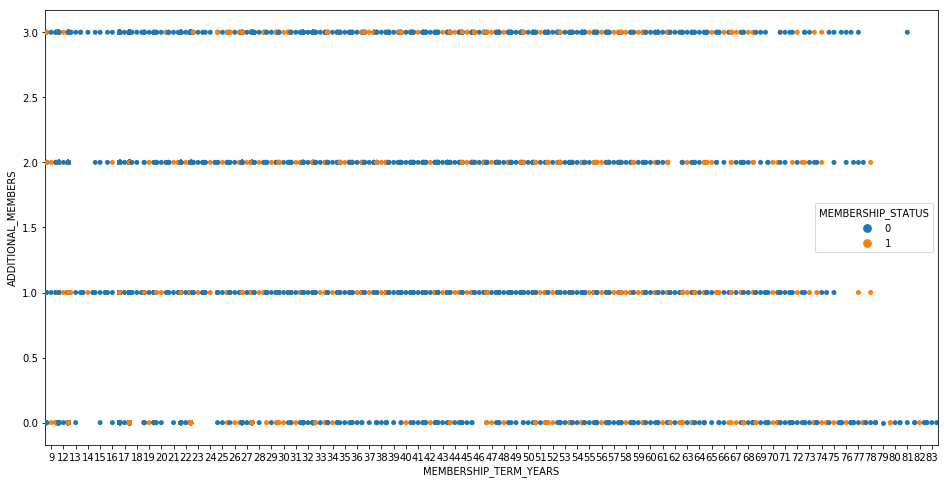

In [49]:
fig = plt.figure(figsize=(16,8))
sns.swarmplot(dataset_dumm.MEMBERSHIP_TERM_YEARS,dataset_dumm.ADDITIONAL_MEMBERS,hue=dataset_dumm.MEMBERSHIP_STATUS)

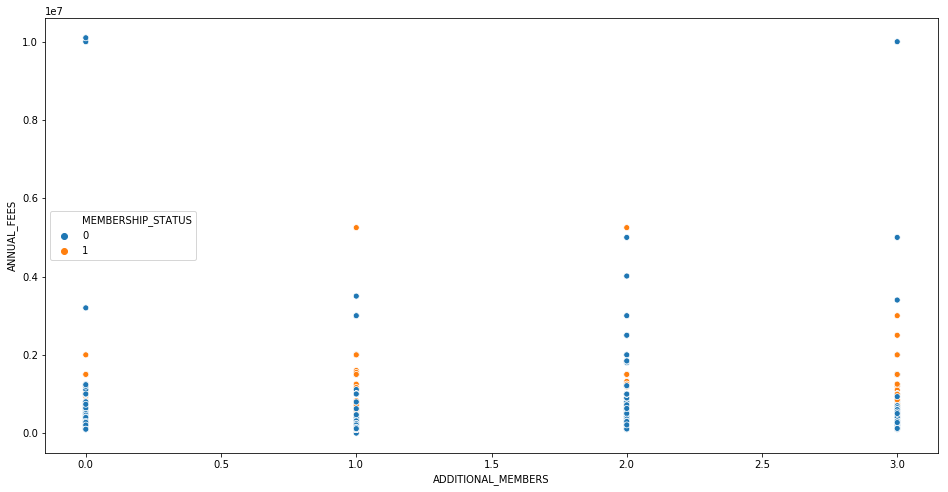

In [32]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(dataset_dumm.ADDITIONAL_MEMBERS,dataset_dumm.ANNUAL_FEES,hue=dataset_dumm.MEMBERSHIP_STATUS)

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.swarmplot(dataset_dumm.ADDITIONAL_MEMBERS,dataset_dumm.ANNUAL_FEES,hue=dataset_dumm.MEMBERSHIP_STATUS)

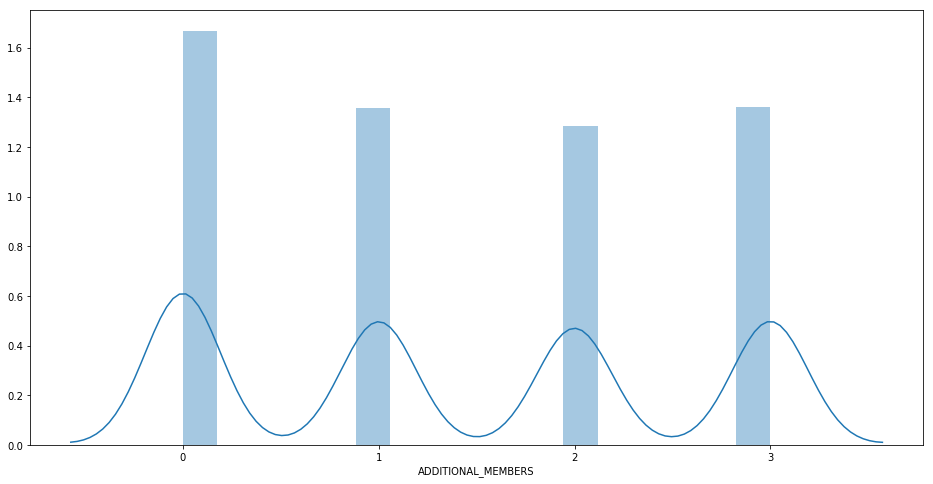

In [33]:
fig = plt.figure(figsize=(16,8))
sns.distplot(dataset_dumm.ADDITIONAL_MEMBERS)

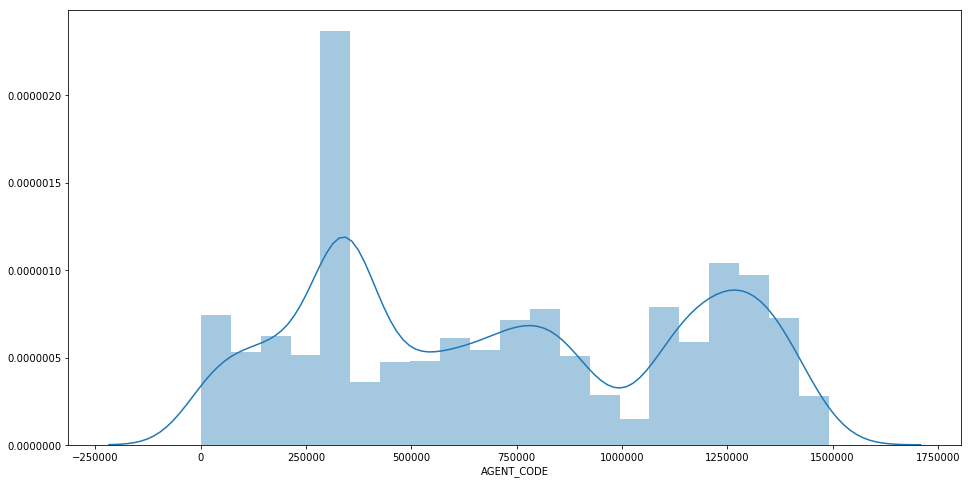

In [34]:
fig = plt.figure(figsize=(16,8))
sns.distplot(dataset_dumm.AGENT_CODE)

### Spliting data into train and test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = dataset_dumm[['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_GENDER','MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD'
                  , 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS', 'AGENT_CODE','MEMBER_MARITAL_STATUS_D'
                  , 'MEMBER_MARITAL_STATUS_M', 'MEMBER_MARITAL_STATUS_S', 'MEMBER_MARITAL_STATUS_W'
                  , 'MEMBERSHIP_PACKAGE_TYPE-A', 'MEMBERSHIP_PACKAGE_TYPE-B', 'PAYMENT_MODE_ANNUAL'
                  , 'PAYMENT_MODE_MONTHLY', 'PAYMENT_MODE_QUARTERLY', 'PAYMENT_MODE_SEMI-ANNUAL'
                  , 'PAYMENT_MODE_SINGLE-PREMIUM']]
y = dataset_dumm['MEMBERSHIP_STATUS']

In [24]:
print(y.head())
X.head()

MEMBERSHIP_NUMBER
A00001    0
A00002    0
A00003    0
A00004    0
A00005    0
Name: MEMBERSHIP_STATUS, dtype: int64


,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,AGENT_CODE,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W,MEMBERSHIP_PACKAGE_TYPE-A,MEMBERSHIP_PACKAGE_TYPE-B,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
MEMBERSHIP_NUMBER,,,,,,,,,,,,,,,,,,,
A00001,29,113125.0,0,25200000.0,1.0,45,2,477,0,1,0,0,0,1,1,0,0,0,0
A00002,38,112220.0,0,10339200.0,1.0,36,3,255,0,1,0,0,0,1,0,0,1,0,0
A00003,12,100000.0,0,14400000.0,1.0,42,1,7866,0,1,0,0,0,1,1,0,0,0,0
A00004,12,100000.0,0,9000000.0,1.0,39,2,200533,0,1,0,0,0,1,1,0,0,0,0
A00005,46,100000.0,0,4800000.0,1.0,27,2,6988,0,1,0,0,0,1,0,0,1,0,0


### Applying gradient boosting and spliting data

In [62]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
#Build modle and fit it

X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
clf.score(X_train,y_train)

0.9486904761904762

In [53]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.90419433045296327

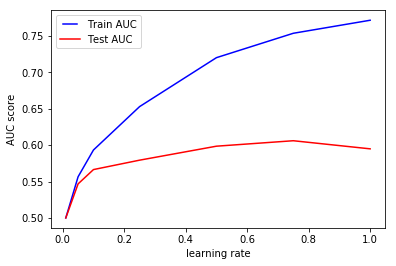

In [32]:
learning_rates = [1, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for var in learning_rates:
   model = GradientBoostingClassifier(learning_rate=var)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()


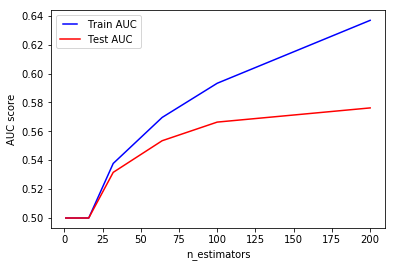

In [33]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for var in n_estimators:
   model = GradientBoostingClassifier(n_estimators=var)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

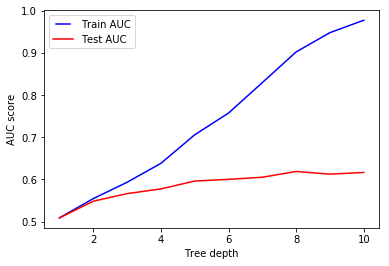

In [34]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


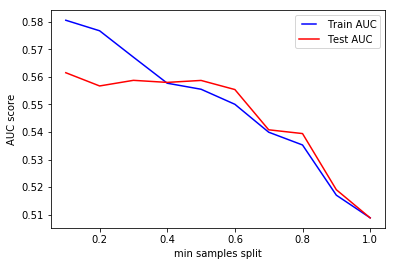

In [35]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [36]:
clf.feature_importances_

array([ 0.0987633 ,  0.13781657,  0.00852825,  0.15992169,  0.02296934,
        0.0921359 ,  0.01944138,  0.31220178,  0.        ,  0.00125451,
        0.00170148,  0.00384106,  0.03585972,  0.01846948,  0.0436894 ,
        0.00980634,  0.01073423,  0.01065425,  0.01221132])

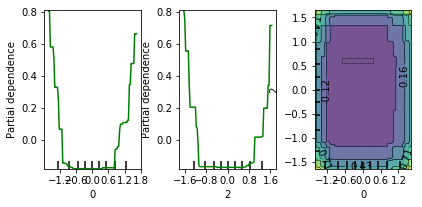

In [142]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

features = [0, 2, (0, 2,)]
fig, axs = plot_partial_dependence(clf, X, features) 

In [71]:
#Parameter tunning

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [72]:
#Create Standardizer
standardizer = StandardScaler()

In [73]:
#Standardize features
X_std = standardizer.fit_transform(X)

In [74]:
#create a pipeline
pipe = Pipeline([('Standardizer',standardizer),('gbm',clf.fit(X_train,y_train))])

In [75]:
#create space of candidate values
est = list(range(1,101)) 
min_split = np.linspace(0.1, 1.0, 10, endpoint=True)
max_d = list(range(1,11)) 
l_rate = list(np.linspace(0.1,1,11)) 

search_space = [{'gbm__n_estimators':est}
                ,{'gbm__max_depth':max_d}
                ,{'gbm__learning_rate':l_rate}
                ,{'gbm__min_samples_split':min_split}]

In [76]:
#Create grid search
clf = GridSearchCV(pipe,search_space,cv=5,verbose=0).fit(X_std,y) 

In [77]:
#View for best estimators for better model performance

clf.best_estimator_.get_params()

{'Standardizer': StandardScaler(copy=True, with_mean=True, with_std=True),
 'Standardizer__copy': True,
 'Standardizer__with_mean': True,
 'Standardizer__with_std': True,
 'gbm': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.45999999999999996, loss='deviance',
               max_depth=3, max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators=100, presort='auto', random_state=None,
               subsample=1.0, verbose=0, warm_start=False),
 'gbm__criterion': 'friedman_mse',
 'gbm__init': None,
 'gbm__learning_rate': 0.45999999999999996,
 'gbm__loss': 'deviance',
 'gbm__max_depth': 3,
 'gbm__max_features': None,
 'gbm__max_leaf_nodes': None,
 'gbm__min_impurity_split': 1e-07,
 'gbm__min_samples_leaf': 1,
 'gbm__min_samples_split': 2,
 'gbm__min_weight_fraction_leaf': 0.0,
 'gbm__n_estimators': 100,
 '

### Applying best parameters to the model

In [99]:
clf = GradientBoostingClassifier(n_estimators=100
                                 ,learning_rate=0.45999999999999996
                                 ,max_depth=2
                                 ,min_samples_split=2
                                 ,random_state=0).fit(X_train, y_train)
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.45999999999999996, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [100]:
y_pred = clf.predict(X_test)

In [101]:
clf.score(X_train,y_train)

0.97392857142857148

In [102]:
clf.score(X_test,y_test)

0.93805555555555553

In [103]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1669,   77],
       [ 146, 1708]])

In [104]:
from sklearn.metrics import classification_report


In [107]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n       -1.0       0.92      0.96      0.94      1746\n        1.0       0.96      0.92      0.94      1854\n\navg / total       0.94      0.94      0.94      3600\n'

### Building ROC Curve

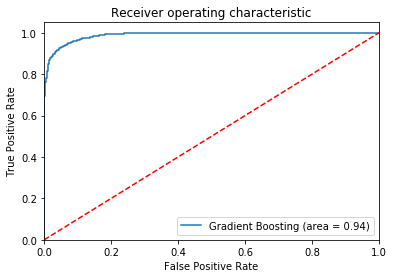

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()